[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 13** | Regressão II | Exercício 23

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('previsao_de_renda.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

1. separando entre teste e treinamento

In [56]:
# preparando o dataset - removendo variáveis que não são necessárias
df = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [57]:
# criando as variáveis dummies
df = pd.get_dummies(df, drop_first=True).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               15000 non-null  bool   
 1   posse_de_imovel                15000 non-null  bool   
 2   qtd_filhos                     15000 non-null  int64  
 3   idade                          15000 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          15000 non-null  float64
 6   renda                          15000 non-null  float64
 7   sexo_M                         15000 non-null  bool   
 8   tipo_renda_Bolsista            15000 non-null  bool   
 9   tipo_renda_Empresário          15000 non-null  bool   
 10  tipo_renda_Pensionista         15000 non-null  bool   
 11  tipo_renda_Servidor público    15000 non-null  bool   
 12  educacao_Pós graduação         15000 non-null 

In [58]:
# dropando NaN
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  bool   
 1   posse_de_imovel                12427 non-null  bool   
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_M                         12427 non-null  bool   
 8   tipo_renda_Bolsista            12427 non-null  bool   
 9   tipo_renda_Empresário          12427 non-null  bool   
 10  tipo_renda_Pensionista         12427 non-null  bool   
 11  tipo_renda_Servidor público    12427 non-null  bool   
 12  educacao_Pós graduação         12427 non-null  bool

In [59]:
# dropando os duplicados
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8655 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               8655 non-null   bool   
 1   posse_de_imovel                8655 non-null   bool   
 2   qtd_filhos                     8655 non-null   int64  
 3   idade                          8655 non-null   int64  
 4   tempo_emprego                  8655 non-null   float64
 5   qt_pessoas_residencia          8655 non-null   float64
 6   renda                          8655 non-null   float64
 7   sexo_M                         8655 non-null   bool   
 8   tipo_renda_Bolsista            8655 non-null   bool   
 9   tipo_renda_Empresário          8655 non-null   bool   
 10  tipo_renda_Pensionista         8655 non-null   bool   
 11  tipo_renda_Servidor público    8655 non-null   bool   
 12  educacao_Pós graduação         8655 non-null   bool 

In [60]:
# separando as variáveis preditoras da variável alvo
X = df.drop('renda', axis=1)
y = df['renda']

In [61]:
# importanto a biblioteca do sklearn
from sklearn.model_selection import train_test_split

In [62]:
# criando o dataset de test e treino, setando random_state em 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [63]:
# importando as bibliotecas
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [64]:
# definindo os valores de alpha
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
melhor_alpha = None
melhor_r2 = -float('inf')

In [65]:
# itera sobre valores de alpha
for alpha in alphas:
    # cria e ajusa o modelo Ridge com o valor atual de alpha
    modelo = Ridge(alpha=alpha, max_iter=100000)
    modelo.fit(X_train, y_train)
    
    # faz previsões na base de teste
    y_pred = modelo.predict(X_test)
    
    # calcula o R^2
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha: {alpha}, R^2: {r2}")
    
    # armazena o melhor modelo
    if r2 > melhor_r2:
        melhor_r2 = r2
        melhor_alpha = alpha

Alpha: 0, R^2: 0.2527171928731432
Alpha: 0.001, R^2: 0.25271757378552717
Alpha: 0.005, R^2: 0.25271909450736685
Alpha: 0.01, R^2: 0.2527209888495682
Alpha: 0.05, R^2: 0.25273588641354583
Alpha: 0.1, R^2: 0.2527538898202847


In [66]:
# exibe o melhor valor de alpha e o R^2 correspondente
print(f"Melhor modelo -> Alpha: {melhor_alpha}, R^2: {melhor_r2}")

Melhor modelo -> Alpha: 0.1, R^2: 0.2527538898202847


O valor de 𝑅2 aumenta conforme o 𝛼 cresce até 0.1, indicando que uma penalização leve melhora a generalização do modelo sem reduzir excessivamente o ajuste aos dados.

3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [67]:
from sklearn.linear_model import Lasso

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
melhor_alpha = None
melhor_r2 = -float('inf')

for alpha in alphas:
    modelo = Lasso(alpha=alpha, max_iter=100000)
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha: {alpha}, R^2: {r2}")
    
    if r2 > melhor_r2:
        melhor_r2 = r2
        melhor_alpha = alpha

print(f"\nMelhor modelo Lasso -> Alpha: {melhor_alpha}, R^2: {melhor_r2}")

c:\Users\earap\anaconda3\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\earap\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\earap\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.207e+11, tolerance: 5.880e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Alpha: 0, R^2: 0.25271719287314565
Alpha: 0.001, R^2: 0.2527179197144823
Alpha: 0.005, R^2: 0.25272082301174703
Alpha: 0.01, R^2: 0.25272444298512453
Alpha: 0.05, R^2: 0.25275303669069626
Alpha: 0.1, R^2: 0.25278786367509454

Melhor modelo Lasso -> Alpha: 0.1, R^2: 0.25278786367509454


O modelo *LASSO* ofereceu uma leve melhora em *R2* em comparação com o *RIDGE* para esse conjunto de dados

4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?

In [68]:
# importando a biblioteca
import statsmodels.api as sm

In [69]:
# convertendo variáveis booleanas para inteiros (0 e 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [70]:
# definindo a função para Stepwise Forward Selection
def stepwise_selection(X, y):
    variaveis_disponiveis = list(X.columns)
    melhor_r2 = -float('inf')
    melhor_modelo = None
    selecionadas = []

    # seleção de stepwise
    while variaveis_disponiveis:
        r2_atual = -float('inf')
        melhor_variavel = None

        # testando as variáveis disponíveis
        for variavel in variaveis_disponiveis:
            modelo = sm.OLS(y_train, sm.add_constant(X_train[selecionadas + [variavel]])).fit()
            y_pred = modelo.predict(sm.add_constant(X_test[selecionadas + [variavel]]))
            r2 = r2_score(y_test, y_pred)

            # mantendo a variável no dataset, caso ela melhore o R2
            if r2 > r2_atual:
                r2_atual = r2
                melhor_variavel = variavel

        # adicionando a variável no dataset
        if r2_atual > melhor_r2:
            melhor_r2 = r2_atual
            selecionadas.append(melhor_variavel)
            variaveis_disponiveis.remove(melhor_variavel)
            melhor_modelo = sm.OLS(y_train, sm.add_constant(X_train[selecionadas])).fit()
            print(f"Variável adicionada: {melhor_variavel}, R^2: {r2_atual}")
        else:
            break  

    return melhor_modelo, selecionadas, melhor_r2

# rodando o stepwise selection
modelo_stepwise, variaveis_selecionadas, melhor_r2_stepwise = stepwise_selection(X, y)

print(f"\nVariáveis selecionadas: {variaveis_selecionadas}")
print(f"Melhor R^2 Stepwise: {melhor_r2_stepwise}")

Variável adicionada: tempo_emprego, R^2: 0.1422534193611743
Variável adicionada: sexo_M, R^2: 0.25145954818292804
Variável adicionada: tipo_renda_Empresário, R^2: 0.2547707158982533
Variável adicionada: educacao_Superior completo, R^2: 0.25610996481954396
Variável adicionada: estado_civil_Solteiro, R^2: 0.25695071983129514
Variável adicionada: estado_civil_União, R^2: 0.25757418582142766
Variável adicionada: posse_de_imovel, R^2: 0.25786700446927924
Variável adicionada: educacao_Superior incompleto, R^2: 0.25792997650766347
Variável adicionada: tipo_renda_Servidor público, R^2: 0.25799363582492063
Variável adicionada: educacao_Pós graduação, R^2: 0.25804237171748445
Variável adicionada: tipo_renda_Bolsista, R^2: 0.25805286448810394
Variável adicionada: qtd_filhos, R^2: 0.2580611422456828
Variável adicionada: tipo_residencia_Com os pais, R^2: 0.25806368687316084

Variáveis selecionadas: ['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'educacao_Superior completo', 'estado_civil_Solt

A execução do modelo stepwise resultou na seleção de 13 variáveis que proporcionaram o melhor valor de *𝑅2* possível no conjunto de testes, que foi de aproximadamente 0,258. Isso significa que o modelo, com essas variáveis selecionadas, explica cerca de 25,8% da variação do alvo nos dados de teste.

6. Melhorando o *𝑅2* na base de testes

7. Ajuste de uma árvore de regressão

In [71]:
from sklearn.tree import DecisionTreeRegressor

# ajuste da árvore de regressão 1
tree_model1 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=100)
tree_model1.fit(X_train, y_train)

# ajuste da árvore de regressão 2
tree_model2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20, random_state=100)
tree_model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=20, random_state=100)

In [72]:
# avaliação do modelo na base de teste 1
y_pred_tree = tree_model1.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"R^2 da Árvore de Regressão: {r2_tree}")

R^2 da Árvore de Regressão: 0.26367503955195004


In [73]:
# avaliação do modelo na base de teste
y_pred_tree = tree_model2.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"R^2 da Árvore de Regressão: {r2_tree}")

R^2 da Árvore de Regressão: 0.26556484241192657


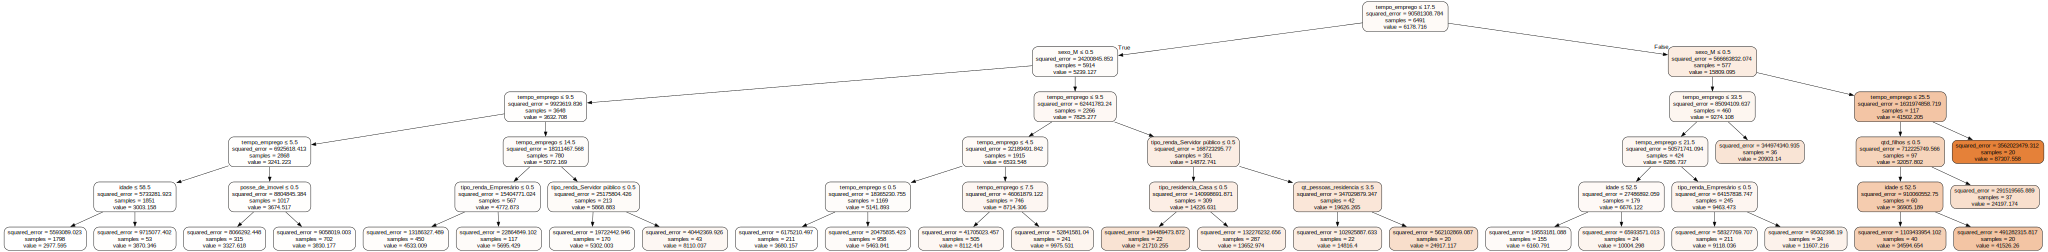

In [74]:
import graphviz
import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# exportando os dados da árvore para o formato DOT
dot_data = export_graphviz(
    tree_model1,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# criando e visualizando o gráfico
graph = graphviz.Source(dot_data, format="png")
graph

O desempenho do modelo da árvore com máximo de profundidade 5 e o mínimo de 50 amostras, foi semelhante ao *Stepwise Forward Selection*.

In [75]:
import seaborn as sns

n_minimo,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
profundidade,,,,,,,,,,,,,,,,,,,,,
1,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,...,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090,0.090090
2,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,...,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202,0.208202
3,0.248486,0.248486,0.248486,0.248486,0.248486,0.248486,0.248486,0.248486,0.248486,0.248486,...,0.291507,0.291507,0.291507,0.291507,0.291507,0.291507,0.291507,0.291539,0.291539,0.291539
4,0.195638,0.192849,0.192849,0.196201,0.196201,0.196201,0.196201,0.196201,0.196201,0.279545,...,0.311125,0.311125,0.312261,0.312288,0.312288,0.312288,0.312288,0.312410,0.312410,0.312414
5,0.122317,0.125750,0.128920,0.190386,0.188631,0.189407,0.193658,0.191991,0.198012,0.281378,...,0.313507,0.313507,0.314643,0.314670,0.314678,0.315899,0.315899,0.316096,0.316096,0.316100
6,0.047862,0.047886,0.100112,0.165095,0.165542,0.166165,0.179972,0.168725,0.176634,0.261772,...,0.305923,0.306161,0.314568,0.314595,0.314509,0.314503,0.314503,0.314875,0.314875,0.314879
7,-0.010143,0.034360,0.084605,0.149242,0.160470,0.159344,0.173482,0.165715,0.173261,0.258245,...,0.307972,0.310759,0.318177,0.318219,0.318120,0.319040,0.320835,0.321074,0.321089,0.319944
8,-0.113948,0.016717,0.083798,0.137418,0.147538,0.146031,0.154071,0.152930,0.161398,0.246006,...,0.304324,0.308090,0.316044,0.316071,0.316308,0.316422,0.318232,0.318479,0.317904,0.316774


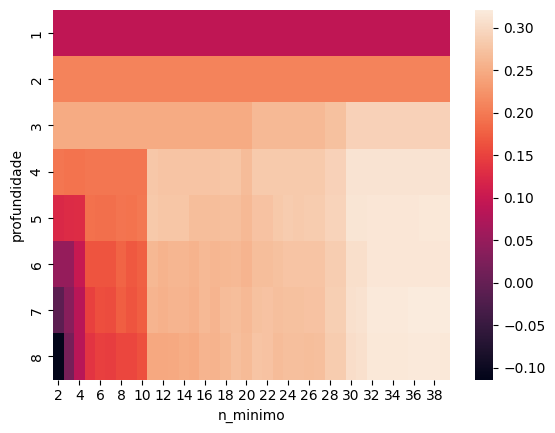

In [76]:
# listas para armazenar os valores de R² e os parâmetros da árvore
mses = []
ind_i = []
ind_j = []

# loop para testar diferentes combinações de profundidade e número mínimo de amostras por folha
for i in range(1, 9): # profundidade varia de 2 a 8
    for j in range(2, 40):  # número mínimo de amostras varia de 2 a 9
        # cria e ajusta o modelo de árvore de decisão com os parâmetros atuais
        tree_model1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        tree_model1.fit(X_train, y_train)

        # avalia o modelo no conjunto de teste
        mse2 = tree_model1.score(X_test, y_test)

        # armazena os resultados
        mses.append(mse2)
        ind_i.append(i)
        ind_j.append(j)

# cria um DataFrame para armazenar os resultados        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})

# cria um mapa de calor para visualizar o R² em função dos parâmetros
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))

# exibe o DataFrame com os resultados para inspeção
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [77]:
# 'cost_complexity_pruning_path' retorna um objeto que contém o caminho de poda de complexidade de custo
path = tree_model1.cost_complexity_pruning_path(X_train, y_train)

# Exibe o caminho de poda que inclui o parâmetro alpha e a complexidade do custo correspondente
path

{'ccp_alphas': array([0.00000000e+00, 4.34837661e+02, 4.43635054e+02, 8.00184469e+02,
        1.55665744e+03, 2.78804599e+03, 2.84691421e+03, 2.86842765e+03,
        3.12126366e+03, 3.38037373e+03, 3.75311230e+03, 3.87548922e+03,
        3.98500156e+03, 5.45137173e+03, 5.70625771e+03, 6.17841749e+03,
        6.28474951e+03, 6.32131795e+03, 6.33655976e+03, 6.65934918e+03,
        6.67375388e+03, 6.71919319e+03, 7.40910425e+03, 7.57235200e+03,
        7.81320163e+03, 8.10807996e+03, 8.62897495e+03, 1.11603745e+04,
        1.34126380e+04, 1.35095435e+04, 1.73952532e+04, 1.74590165e+04,
        1.93299115e+04, 2.18460601e+04, 2.52645520e+04, 2.55952989e+04,
        2.90663487e+04, 3.41762274e+04, 3.51719553e+04, 3.53943635e+04,
        3.58233245e+04, 4.01852612e+04, 4.10458273e+04, 4.55771087e+04,
        5.03383239e+04, 5.15699255e+04, 5.34324010e+04, 5.74943744e+04,
        7.86259048e+04, 8.47535053e+04, 8.72444844e+04, 1.25153791e+05,
        1.66080125e+05, 3.16707264e+05, 6.28844111

Text(0, 0.5, 'Impureza total das folhas')

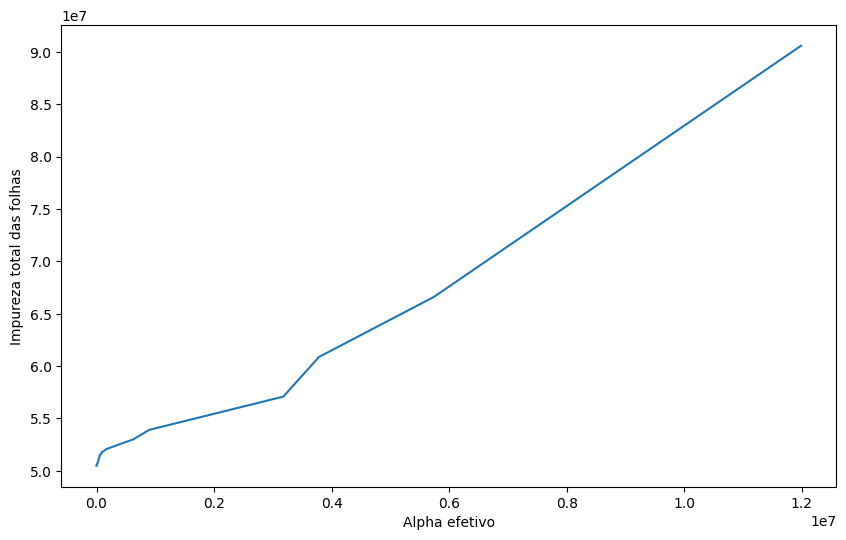

In [78]:
import matplotlib.pyplot as plt
# Extraindo os valores de alpha efetivo e impureza total das folhas do caminho de poda
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Criar uma nova figura para o gráfico com o tamanho especificad
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [79]:
# Inicializa uma lista vazia para armazenar os modelos de DecisionTreeRegressor.
clfs = []

# Itera sobre uma lista de valores de ccp_alpha (pode ser uma lista de diferentes valores para o parâmetro de poda).
for ccp_alpha in ccp_alphas:
    # Cria uma instância do DecisionTreeRegressor com um valor específico de ccp_alpha.
    # O ccp_alpha é um parâmetro de poda que controla a complexidade da árvore, ajudando a prevenir overfitting.
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    # Ajusta o modelo aos dados de treino (X_train e y_train).
    clf.fit(X_train, y_train)
    # Adiciona o modelo treinado à lista clfs.
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

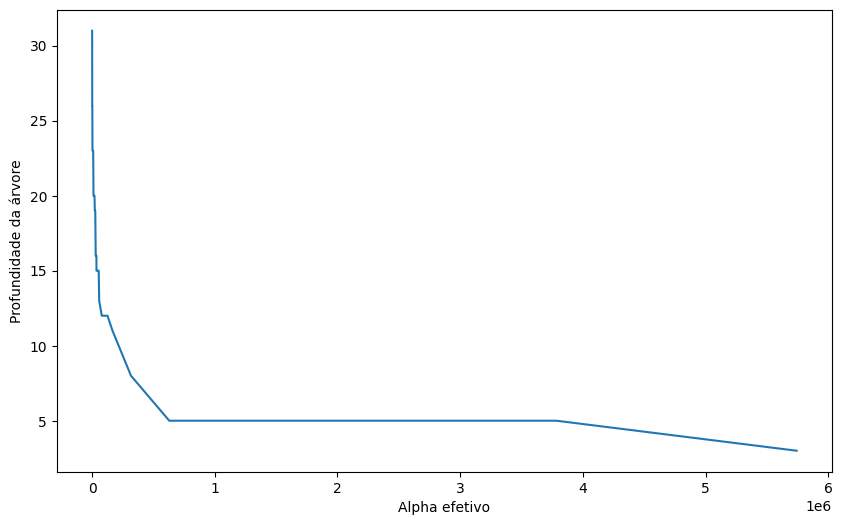

In [80]:
# Cria uma lista com as profundidades máximas das árvores para cada modelo treinado.
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Alpha efetivo")
plt.ylabel("Profundidade da árvore")

In [81]:
from sklearn.metrics import mean_squared_error

# Calcula o erro quadrático médio (MSE) para o conjunto de treino e o conjunto de teste
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

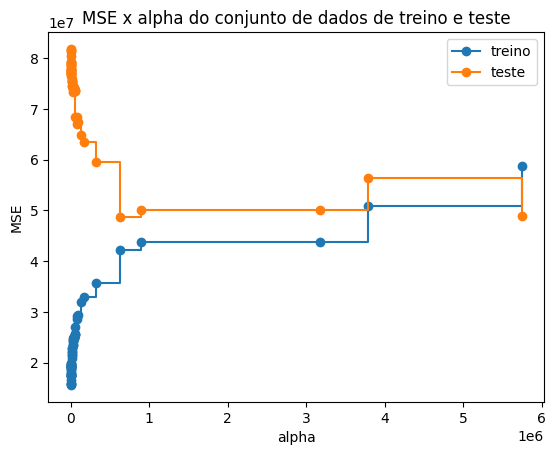

In [82]:
# Cria uma nova figura e um conjunto de eixos para o gráfico.
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")

# Plota o MSE do conjunto de treino em função de alpha.
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
# Plota o MSE do conjunto de teste em função de alpha.
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

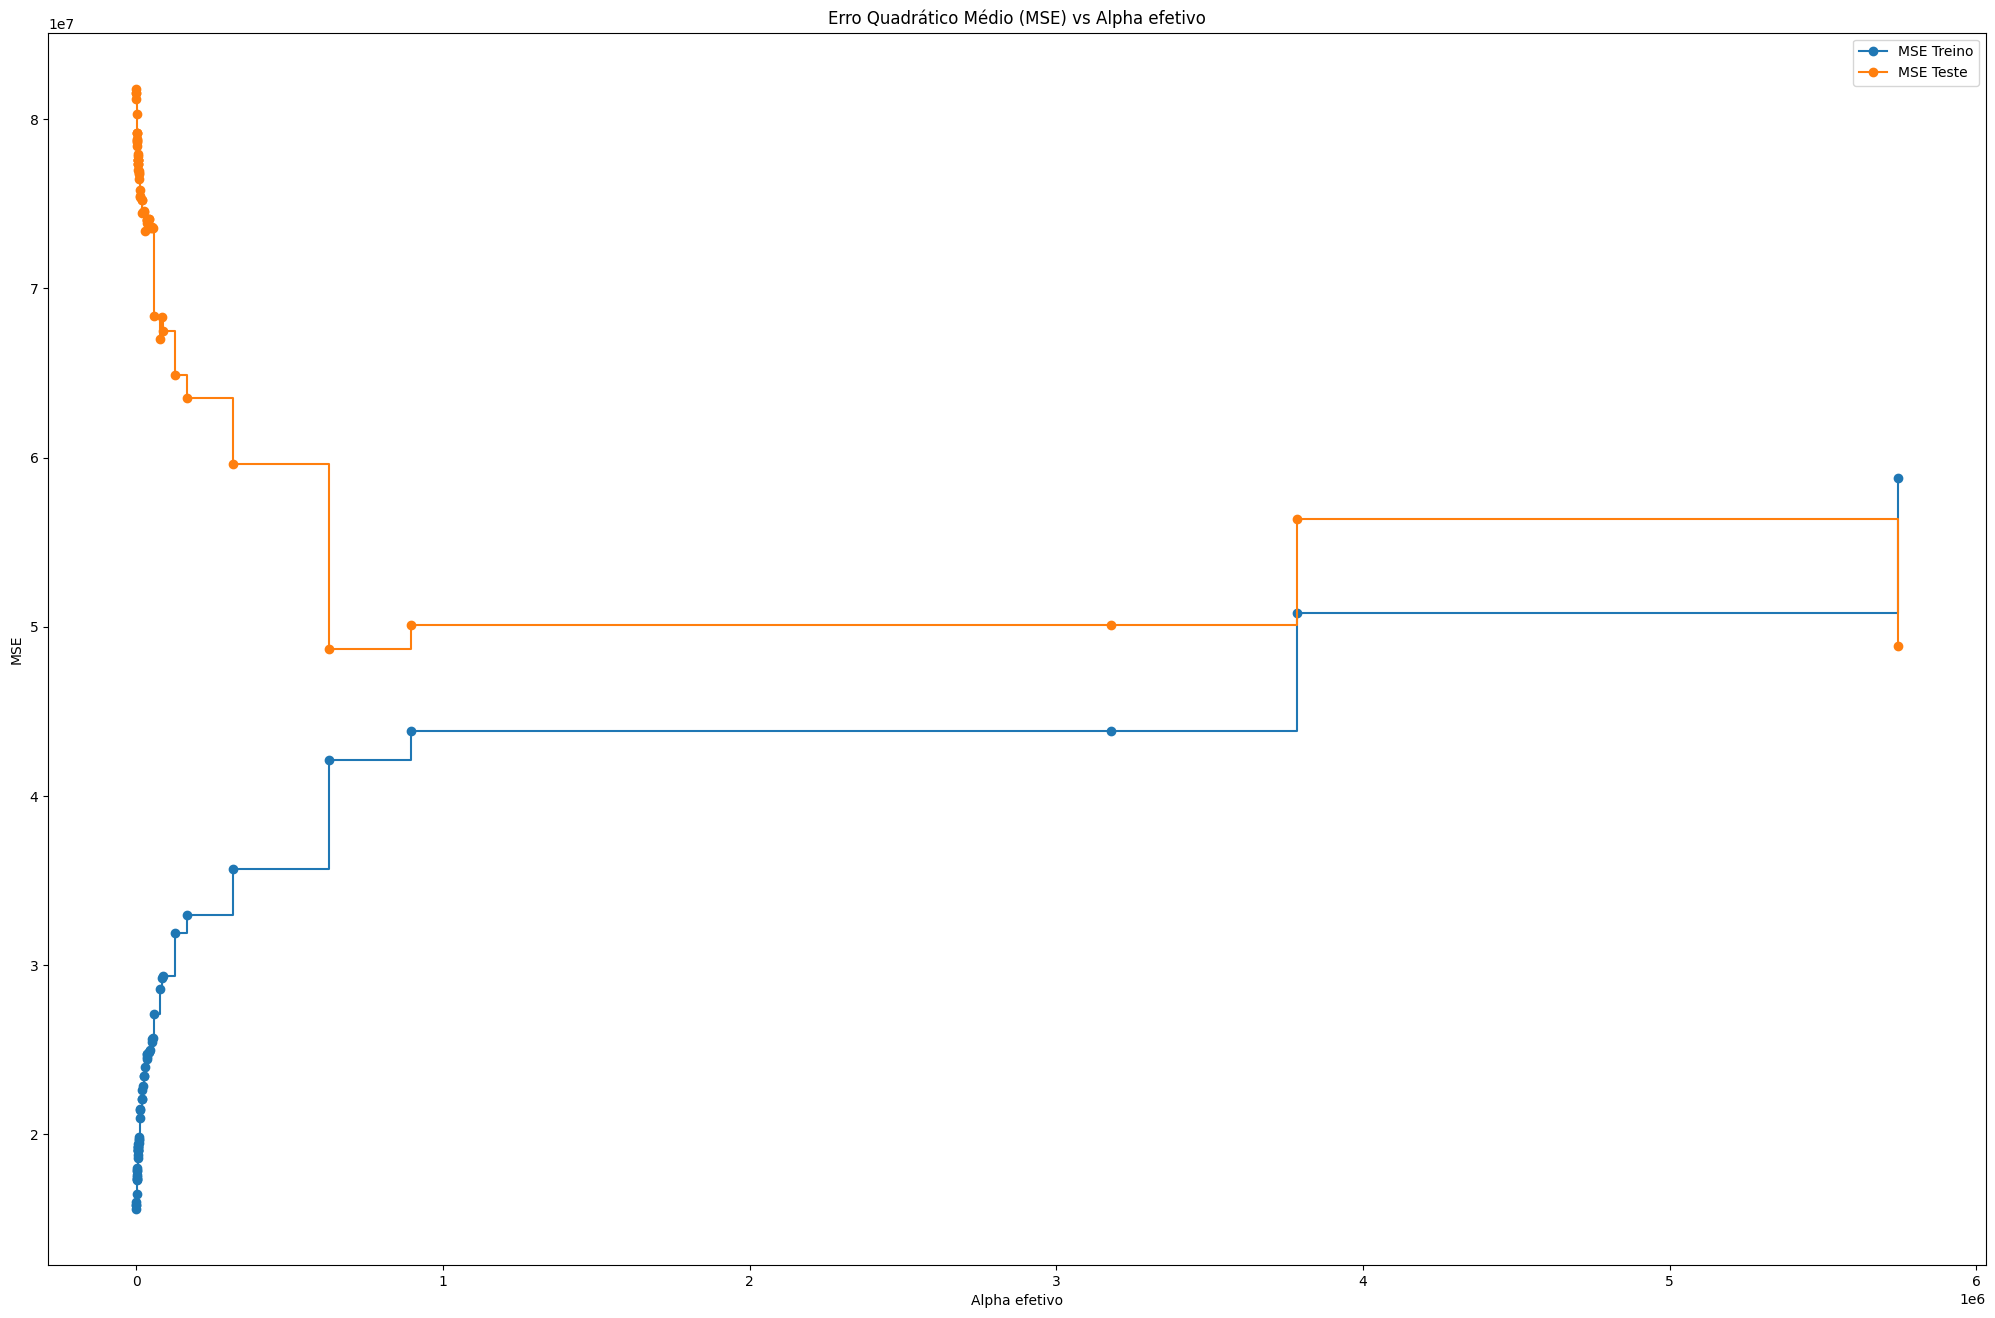

In [83]:
# Gráfico do MSE em função do alpha efetivo para o conjunto de treino e teste
plt.figure(figsize=(25, 16))
plt.plot(ccp_alphas[:-1], train_scores[:-1], label="MSE Treino", marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], test_scores[:-1], label="MSE Teste", marker='o', drawstyle="steps-post")
plt.xlabel("Alpha efetivo")
plt.ylabel("MSE")
plt.title("Erro Quadrático Médio (MSE) vs Alpha efetivo")
plt.legend()
plt.show()


Para valores baixos de alpha, o MSE é alto, indicando que o modelo não está se ajustando bem aos dados. À medida que alpha aumenta, o MSE do conjunto de treino diminui e se estabiliza, mostrando que o modelo está se ajustando melhor aos dados de treino. No entanto, o MSE do conjunto de teste também diminui, mas a um ritmo diferente, e se estabiliza em um valor mais alto do que o conjunto de treino.

Isso sugere que para valores baixos de alpha, o modelo pode estar sofrendo de overfitting (se ajusta muito bem aos dados de treino, mas não generaliza bem para novos dados). Conforme alpha aumenta, o modelo se torna mais regularizado, reduzindo o overfitting e melhorando a generalização. No entanto, se alpha for muito alto, o modelo pode começar a sofrer de underfitting (não se ajusta bem nem aos dados de treino nem aos de teste).

6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [84]:
from sklearn.linear_model import LinearRegression

# criando algumas interações
X['tempo_idade'] = X['tempo_emprego'] * X['idade']
X['filhos_residencia'] = X['qtd_filhos'] / X['qt_pessoas_residencia']
X['idade_veiculo'] = X['idade'] * X['posse_de_veiculo'].astype(int)

# reajustando o modelo de regressão linear com as novas variáveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# ajustando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# fazendo previsões e avaliando o novo R^2 na base de teste
y_pred = model.predict(X_test)
new_r2 = r2_score(y_test, y_pred)

print(f"Novo R^2 com interações: {new_r2}")


Novo R^2 com interações: 0.2372117876780948
